In [2]:
import numpy as np
from sktime.utils.plotting import plot_series
from sktime.datasets import load_airline
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
import pandas as pd

In [3]:
y = load_airline()

In [4]:
y_train, y_test = temporal_train_test_split(y, test_size=36)

In [5]:
fh = np.arange(1, 2)
print(fh)

[1]


In [6]:
forecaster = NaiveForecaster(strategy="last", sp=1)
forecaster.fit(y_train)
y_pred_1 = forecaster.predict(fh)

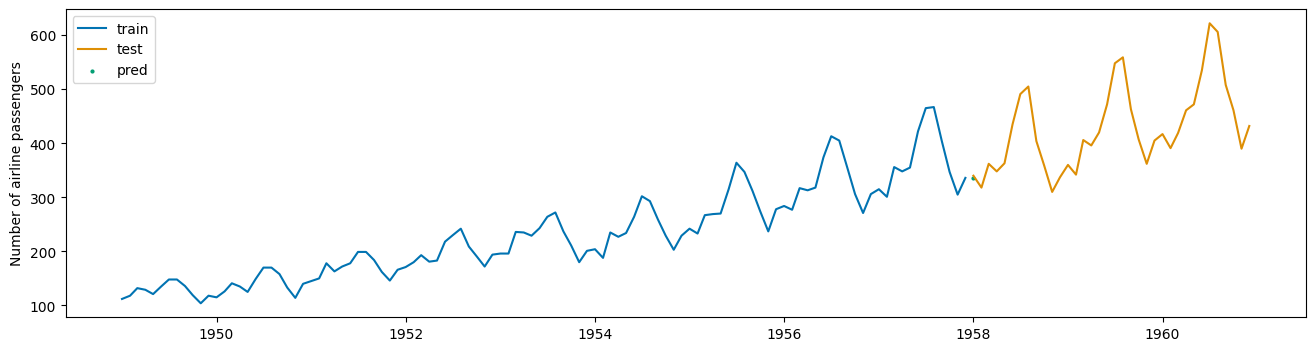

In [7]:
fig, ax = plot_series(
    y_train,
    y_test,
    y_pred_1,
    labels=["train", "test", "pred"],
    markers=[None, None, "o"],
)

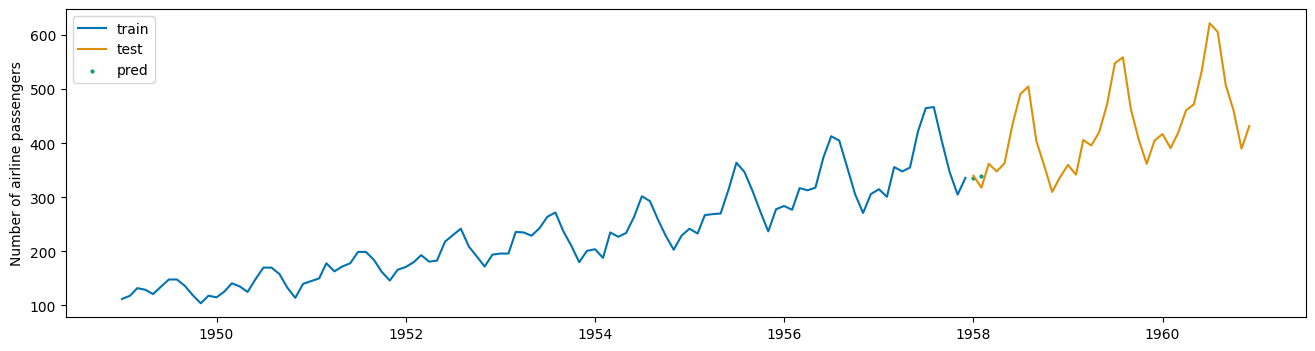

In [8]:
import warnings

warnings.filterwarnings("ignore")

forecaster.update(y_test[:1])
y_pred_2 = forecaster.predict(fh)

y_pred = pd.concat([y_pred_1, y_pred_2])
fig, ax = plot_series(
    y_train,
    y_test,
    y_pred,
    labels=["train", "test", "pred"],
    markers=[None, None, "o"],
)

In [9]:
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)

for i in range(0, y_test.shape[0] - 1):
    forecaster.update(y_test[i : i + 1])
    y_pred_temp = forecaster.predict(fh)
    y_pred = pd.concat([y_pred, y_pred_temp])

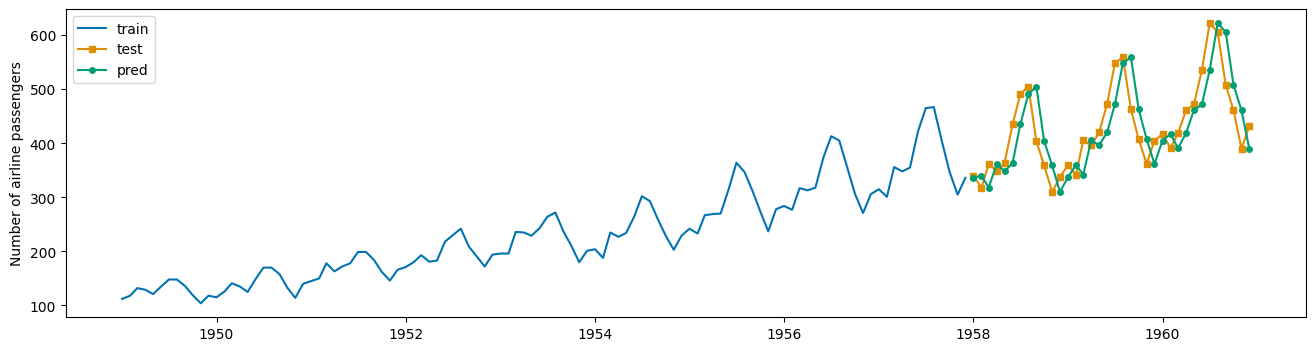

In [10]:
fig, ax = plot_series(
    y_train,
    y_test,
    y_pred,
    labels=["train", "test", "pred"],
    markers=[None, "s", "o"],
)

In [11]:
mean_absolute_percentage_error(y_test, y_pred, symmetric=False)

np.float64(0.09833482876632028)

In [12]:
# y_test.index

In [13]:
# y_pred.index

## Using Splitters

### SlidingWindowSplitter

In [14]:
from sktime.forecasting.model_selection import SlidingWindowSplitter

In [15]:
ts = np.arange(10)
splitter = SlidingWindowSplitter(fh=[2, 4], window_length=3, step_length=2)
list(splitter.split(ts))

[(array([0, 1, 2]), array([4, 6])), (array([2, 3, 4]), array([6, 8]))]

In [16]:
list(splitter.split(y_test))

[(array([0, 1, 2]), array([4, 6])),
 (array([2, 3, 4]), array([6, 8])),
 (array([4, 5, 6]), array([ 8, 10])),
 (array([6, 7, 8]), array([10, 12])),
 (array([ 8,  9, 10]), array([12, 14])),
 (array([10, 11, 12]), array([14, 16])),
 (array([12, 13, 14]), array([16, 18])),
 (array([14, 15, 16]), array([18, 20])),
 (array([16, 17, 18]), array([20, 22])),
 (array([18, 19, 20]), array([22, 24])),
 (array([20, 21, 22]), array([24, 26])),
 (array([22, 23, 24]), array([26, 28])),
 (array([24, 25, 26]), array([28, 30])),
 (array([26, 27, 28]), array([30, 32])),
 (array([28, 29, 30]), array([32, 34]))]

In [17]:
y_train.shape[0]

108

### ExpandingWindowSplitter

In [18]:
from sktime.forecasting.model_selection import ExpandingWindowSplitter

splitter = ExpandingWindowSplitter(fh=[1], initial_window=108, step_length=1)

In [19]:
# for i in splitter.split(y):
#     print(i)

In [20]:
y_pred = []
for ix, iy in splitter.split(y):
    y_train_i = y.iloc[ix]
    y_test_i = y.iloc[iy]
    forecaster = NaiveForecaster(strategy="last", sp=1)
    y_pred_temp = forecaster.fit(y_train_i).predict([1])
    y_pred.append(y_pred_temp)
y_pred = pd.concat(y_pred)

In [21]:
y_pred.shape

(36,)

In [22]:
y_test.shape

(36,)

In [23]:
mean_absolute_percentage_error(y_test, y_pred, symmetric=False)

np.float64(0.09833482876632028)